In [364]:
import pandas as pd
import numpy as np

In [365]:
pwd

'/Users/usuario/PycharmProjects/pythonProject5/UCEMA/Examen/script'

In [366]:
path = "..//fuentes/recibos_facts_debitos.csv"

recibos = pd.read_csv(path)

In [367]:
recibos

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41329,41329,REC X0099-00006794,2018-09-04,2446.00,12.0
41330,41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,41333,REC X0099-00006794,2022-09-04,NaN,NaN


In [368]:
recibos = recibos.drop(columns = ['Unnamed: 0'])
recibos

,Nro Comprobante,Fecha,Total,ID_cliente
0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...
41329,REC X0099-00006794,2018-09-04,2446.00,12.0
41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,REC X0099-00006794,2022-09-04,NaN,NaN


## 1. Cuáles son las características principales del DF?

In [369]:
recibos.info() #devuelve la informacion principal del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41334 entries, 0 to 41333
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nro Comprobante  41334 non-null  object 
 1   Fecha            41334 non-null  object 
 2   Total            41331 non-null  float64
 3   ID_cliente       41330 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.3+ MB


## Cantidad de rows y columnas.


In [370]:
recibos.shape #devuelve las dimensiones: (filas, columnas)

(41334, 4)

## Clases de datos

In [371]:
recibos.dtypes #devuelve el tipo de dato de cada columna

Nro Comprobante     object
Fecha               object
Total              float64
ID_cliente         float64
dtype: object

# 2. El dataset cuenta con datos faltantes?

## Muestre la cantidad de faltantes por columnas

In [372]:
faltantes= recibos.isna().sum()
faltantes #devuelve true o false dependiendo de si los valores son nans o no, y despues suma los true por columna.

Nro Comprobante    0
Fecha              0
Total              3
ID_cliente         4
dtype: int64

## Que porcentaje de faltantes hay

In [373]:
total_datos = len(recibos)*len(recibos.columns) #recibos.count().sum() + faltantes.sum()
total_datos

165336

In [374]:
str(round(((faltantes.sum()/total_datos)*100),4)) + " %" #porcentaje de datos faltantes.
#cuenta la cantidad de datos totales faltantes y lo divide por la cantidad de valores de la tabla
#despues lo redondea

'0.0042 %'

## Muestre las filas con datos faltantes

In [375]:
recibos[recibos.isna().any(axis = 1)] #devuelve true o false dependiendo de si los valores son o no nulos.
#El any devuelve que filas tienen nans y despues con esa condicion filtra el dataframe.

,Nro Comprobante,Fecha,Total,ID_cliente
41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,REC X0099-00006794,2022-09-04,NaN,NaN
41333,REC X0099-00006794,2022-03-01,10000000.0,NaN


## Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?


Los valores nulos se pueden tratar asignandoles el valor cero o asignandoles el promedio de los datos restantes, ya que borrandolos con dropna() estariamos obteniendo una vista sesgada de los datos.

## Haga el tratamiento de los valores faltantes en caso de creerlo necesario.


In [376]:
recibos = recibos.fillna(value = 0)

## 3. Imprima las estadísticas básicas del dataset. Hay un método para eso tanto en python cómo en R (count, mean, 25%,etc)

In [377]:
recibos.describe() #realiza las funciones estadisticas principales

,Total,ID_cliente
count,4.133400e+04,41334.000000
mean,1.302339e+03,483.199376
std,4.919850e+04,274.844596
min,0.000000e+00,0.000000
25%,3.313950e+02,242.000000
50%,9.989800e+02,476.000000
75%,1.000000e+03,733.000000
max,1.000000e+07,964.000000


## 4. ¿Qué es un dato outlier? ¿Cómo procedería al análisis del mismo?


4. Los datos outliers son datos que tienen un comportamiento fuera de lo normal, pero eso no significa que sean datos erroneos. Para tratarlos lo primero que habria que hacer es identificarlos para poder evaluar si es conveniente dejarlos de lado para el analisis o tratarlos de una manera distinta.

## 5. Cambie el nombre de las columnas a "nro_comprobante", "fecha","monto","id_cliente"

In [378]:
recibos.columns

Index(['Nro Comprobante', 'Fecha', 'Total', 'ID_cliente'], dtype='object')

In [379]:
recibos = recibos.rename(columns = {'Nro Comprobante':"nro_comprobante", 'Fecha': "fecha",'Total': "monto",'ID_cliente': "id_cliente"
})
recibos

,nro_comprobante,fecha,monto,id_cliente
0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...
41329,REC X0099-00006794,2018-09-04,2446.00,12.0
41330,REC X0099-00006794,2014-09-04,0.00,0.0
41331,REC X0099-00006794,2014-09-04,0.00,0.0
41332,REC X0099-00006794,2022-09-04,0.00,0.0


## 6. ¿Cuantos clientes únicos hay en el dataset?

 Cantidad de clientes unicos. Elegi el ID porque es un valor que identifica a cada cliente, por lo que el de todos necesariamente es distinto

In [380]:
recibos.id_cliente.nunique()

965

## 7. Cree una nueva columna que llamada “tipo” que consista en agarrar la columna “nro_comprobante” y separar el primer string dejando sólo si es recibo, factura, nota de débito o nota de crédito.

In [381]:
recibos["tipo"] = recibos.nro_comprobante.apply(lambda x:x.split(" ")[0])
recibos

,nro_comprobante,fecha,monto,id_cliente,tipo
0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC
1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC
2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC
3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC
4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC
...,...,...,...,...,...
41329,REC X0099-00006794,2018-09-04,2446.00,12.0,REC
41330,REC X0099-00006794,2014-09-04,0.00,0.0,REC
41331,REC X0099-00006794,2014-09-04,0.00,0.0,REC
41332,REC X0099-00006794,2022-09-04,0.00,0.0,REC


# 8. Tipos de Comprobante.Responda.

## Cuantos registros se tienen de cada uno?

In [382]:
tipos = recibos.groupby("tipo")
tipos.count()

,nro_comprobante,fecha,monto,id_cliente
tipo,,,,
FAC,10974,10974,10974,10974
N/C,2387,2387,2387,2387
N/D,15762,15762,15762,15762
REC,12211,12211,12211,12211


## Montos totales por tipo

In [383]:
tipos.monto.sum()

tipo
FAC     7598706.46
N/C     1335102.12
N/D     8204046.41
REC    36693028.63
Name: monto, dtype: float64

## 9. ¿Dé qué tipo de datos es la columna fecha? Pasarla a datetime

In [384]:
recibos.fecha.dtype #Un tipo ‘O’ solo significa “objeto” que en el mundo de Pandas es una secuencia de caracteres (texto).

dtype('O')

In [385]:
recibos["fecha"] = pd.to_datetime(recibos["fecha"])
recibos.fecha.dtype

dtype('<M8[ns]')

## 10. Crear la columna año y mes.

In [386]:
recibos["year_month"] = recibos["fecha"].dt.to_period('m')
recibos

,nro_comprobante,fecha,monto,id_cliente,tipo,year_month
0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC,2015-12
1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC,2015-12
2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC,2015-12
3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC,2015-12
4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC,2015-12
...,...,...,...,...,...,...
41329,REC X0099-00006794,2018-09-04,2446.00,12.0,REC,2018-09
41330,REC X0099-00006794,2014-09-04,0.00,0.0,REC,2014-09
41331,REC X0099-00006794,2014-09-04,0.00,0.0,REC,2014-09
41332,REC X0099-00006794,2022-09-04,0.00,0.0,REC,2022-09


## 11. Sumar sólo lo cobrado (REC y N/D) y mostrar una tabla que tenga como indice fecha(año-mes) y columna monto_cobrado, cantidad_recibos. (group by)

In [387]:
cobrado = recibos[(recibos.tipo == "REC") | (recibos.tipo == "N/D")]
cobrado['recibo'] = np.where(cobrado['tipo'] == "REC", 1, 0)
cobrado

/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1832/991809704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cobrado['recibo'] = np.where(cobrado['tipo'] == "REC", 1, 0)


,nro_comprobante,fecha,monto,id_cliente,tipo,year_month,recibo
13361,N/D B0001-00000001,2016-01-12,66.16,536.0,N/D,2016-01,0
13362,N/D B0001-00000002,2016-01-28,110.54,838.0,N/D,2016-01,0
13363,N/D B0001-00000003,2016-02-05,16.46,536.0,N/D,2016-02,0
13364,N/D B0001-00000004,2016-02-11,83.10,838.0,N/D,2016-02,0
13365,N/D B0001-00000005,2016-02-16,49.99,801.0,N/D,2016-02,0
...,...,...,...,...,...,...,...
41329,REC X0099-00006794,2018-09-04,2446.00,12.0,REC,2018-09,1
41330,REC X0099-00006794,2014-09-04,0.00,0.0,REC,2014-09,1
41331,REC X0099-00006794,2014-09-04,0.00,0.0,REC,2014-09,1
41332,REC X0099-00006794,2022-09-04,0.00,0.0,REC,2022-09,1


In [388]:
cobrado_df = cobrado.groupby("year_month").agg(monto_cobrado =  ('monto', 'sum'), cantidad_recibos = ("recibo", "sum"))
cobrado_df

,monto_cobrado,cantidad_recibos
year_month,,
2014-09,0.00,2
2015-12,3339.00,4
2016-01,23217.27,21
2016-02,87138.09,56
2016-03,193843.65,128
...,...,...
2022-03,10245495.68,14
2022-04,145510.59,10
2022-05,87518.58,7


## 12. ¿Cuantos valores hay mayores a 60000 de la columna monto en el dataset general?

In [389]:
len(recibos[recibos.monto > 60000])

1

## 13. ¿Cual es el valor máximo? ¿Debería eliminarlo? ¿Por qué?

No deberia eliminarlo porque es un dato recolectado, eliminandolo obtendriamos una vista sesgada de la informacion.

In [390]:
recibos.monto.max()

10000000.0

## 14. No tenga en cuenta el valor máximo para los siguientes análisis.


In [391]:
recibos_sin_max = recibos.drop(recibos.monto.idxmax())
recibos_sin_max.monto.max()

56000.0

## 15. En el total del dataset. Cuanto representa lo facturado sobre lo cobrado.

In [392]:
facturado = recibos[recibos["tipo"] == "FAC"]
facturado

,nro_comprobante,fecha,monto,id_cliente,tipo,year_month
0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC,2015-12
1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC,2015-12
2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC,2015-12
3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC,2015-12
4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC,2015-12
...,...,...,...,...,...,...
10969,FAC B0099-00001779,2022-06-16,998.98,659.0,FAC,2022-06
10970,FAC B0099-00001780,2022-06-16,206.47,659.0,FAC,2022-06
10971,FAC B0099-00001781,2022-06-21,762.40,158.0,FAC,2022-06
10972,FAC B0099-00001782,2022-06-22,998.98,434.0,FAC,2022-06


In [393]:
str(round(((facturado.monto.sum()/cobrado.monto.sum())*100), 2)) + " %"

'16.92 %'

## Si sabe que lo facturado es el IVA ¿Tiene sentido? ¿Cómo lo interpretas?

# **Dataset Dolar**

In [394]:
path = "..//fuentes/dolar_blue - Hoja 1.csv"
dolar = pd.read_csv(path)

In [395]:
dolar

,Fecha,Compra,Venta
0,15-07-2022,"283,00","293,00"
1,14-07-2022,"279,00","289,00"
2,13-07-2022,"273,00","283,00"
3,12-07-2022,"262,00","272,00"
4,11-07-2022,"258,00","268,00"
...,...,...,...
1758,22-06-2015,"12,95","13,05"
1759,19-06-2015,"12,92","13,02"
1760,18-06-2015,"12,98","13,08"
1761,17-06-2015,"12,84","12,94"


## 16. Repita puntos 1,2,3 ahora para este dataset


In [396]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   1763 non-null   object
 1   Compra  1763 non-null   object
 2   Venta   1763 non-null   object
dtypes: object(3)
memory usage: 41.4+ KB


In [397]:
dolar.shape

(1763, 3)

In [398]:
dolar.dtypes

Fecha     object
Compra    object
Venta     object
dtype: object

In [399]:
nulos= dolar.isnull().sum()
nulos

Fecha     0
Compra    0
Venta     0
dtype: int64

In [400]:
total_dolar = dolar.count().sum() + nulos.sum()
total_dolar

5289

In [401]:
round(((nulos.sum()/total_dolar)*100),4) #no hay

0.0

In [402]:
dolar[dolar.isna().any(axis = 1)]

,Fecha,Compra,Venta


In [403]:
dolar.describe()

,Fecha,Compra,Venta
count,1763,1763,1763
unique,1732,727,723
top,31-08-2021,"197,00","151,00"
freq,7,16,16


## Pasar a datetime la columna Fecha

In [404]:
dolar["Fecha"] = pd.to_datetime(dolar["Fecha"])
dolar.Fecha.dtype

/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1832/2334349146.py:1: UserWarning: Parsing '15-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dolar["Fecha"] = pd.to_datetime(dolar["Fecha"])
/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1832/2334349146.py:1: UserWarning: Parsing '14-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dolar["Fecha"] = pd.to_datetime(dolar["Fecha"])
/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1832/2334349146.py:1: UserWarning: Parsing '13-07-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dolar["Fecha"] = pd.to_datetime(dolar["Fecha"])
/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1832/2334349146.py:1: UserWarning: Parsing '30-06-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent par

dtype('<M8[ns]')

## Crear año-mes

In [405]:
dolar["year_month"] = dolar["Fecha"].dt.to_period('m')
dolar

,Fecha,Compra,Venta,year_month
0,2022-07-15,"283,00","293,00",2022-07
1,2022-07-14,"279,00","289,00",2022-07
2,2022-07-13,"273,00","283,00",2022-07
3,2022-12-07,"262,00","272,00",2022-12
4,2022-11-07,"258,00","268,00",2022-11
...,...,...,...,...
1758,2015-06-22,"12,95","13,05",2015-06
1759,2015-06-19,"12,92","13,02",2015-06
1760,2015-06-18,"12,98","13,08",2015-06
1761,2015-06-17,"12,84","12,94",2015-06


## 18. En python pase la columna Dolar Venta a Float.
 (Hint en python dolar_df.Venta.apply(lambda x:x.replace(",",".")))

In [406]:
dolar.Compra = dolar.Compra.apply(lambda x:x.replace(",","."))
dolar.Compra = dolar.Compra.astype(float)

In [407]:
dolar.Venta = dolar.Venta.apply(lambda x:x.replace(",","."))
dolar.Venta = dolar.Venta.astype(float)

## 17. Cree un dataset del valor promedio de la venta del dólar por año-mes (groupby).

In [408]:
valor_promedio = dolar.groupby("year_month").Venta.mean()
valor_promedio

year_month
2015-01     14.857500
2015-02     15.098000
2015-03     14.854000
2015-04     15.162500
2015-05     15.296667
              ...    
2022-08    218.900000
2022-09    207.750000
2022-10    207.300000
2022-11    215.750000
2022-12    219.750000
Freq: M, Name: Venta, Length: 96, dtype: float64

## 19. Cree un dataset que sea el resultado de hacer un merge/join entre el dataset agrupado de recibos_facts_debitos con el agrupado de dolar del punto anterior.
 (Hint en python pd.merge(rec_mensual, dolar_df_mensual,how="left", left_index=True,right_index=True)

In [409]:
pd.merge(cobrado_df, valor_promedio,how="left", left_index=True,right_index=True)

,monto_cobrado,cantidad_recibos,Venta
year_month,,,
2014-09,0.00,2,NaN
2015-12,3339.00,4,14.392667
2016-01,23217.27,21,14.732727
2016-02,87138.09,56,15.322632
2016-03,193843.65,128,15.280000
...,...,...,...
2022-03,10245495.68,14,202.666667
2022-04,145510.59,10,206.058824
2022-05,87518.58,7,208.266667


# Solo en Python (25,26,27,28,29)

In [410]:
import matplotlib.pyplot as plt

## 25. Hacer un lineplot del total cobrado

In [450]:
cobrado['month'] = cobrado.year_month.dt.month
cobrado_df2 = cobrado.groupby("month").agg(monto_cobrado =  ('monto', 'sum'), cantidad_recibos = ("recibo", "sum"))
cobrado_df2

/var/folders/04/tp4wyrys03s5z6y1v720v3580000gn/T/ipykernel_1832/1606831091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cobrado['month'] = cobrado.year_month.dt.month


,monto_cobrado,cantidad_recibos
month,,
1,2652582.24,898
2,2757687.50,921
3,13164873.10,1116
4,2867886.33,1054
5,3083125.91,1115
6,3270649.14,1129
7,3510050.13,1243
8,3142705.70,1187
9,2560403.87,889


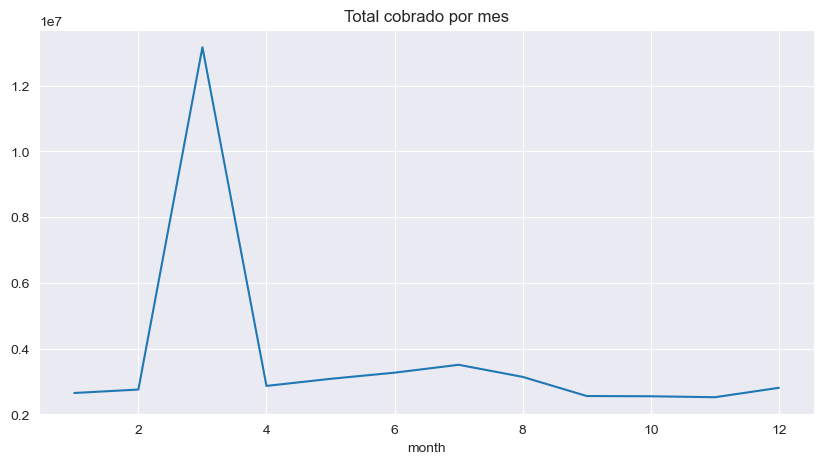

In [437]:
cobrado_df2.monto_cobrado.plot.line(figsize = (10, 5))
plt.title("Total cobrado por mes");

## 26. lineplot con clientes únicos por mes en otro gráfico

In [435]:
recibos['month'] = recibos.year_month.dt.month
clientes_unicos = recibos.groupby("month").id_cliente.nunique()

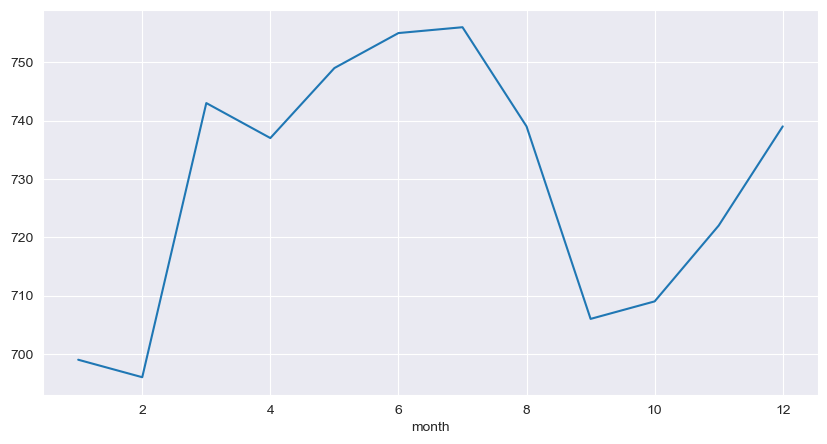

In [436]:
clientes_unicos.plot.line(figsize = (10, 5));

## 27. Poner ambas lineas en un mismo gráfico

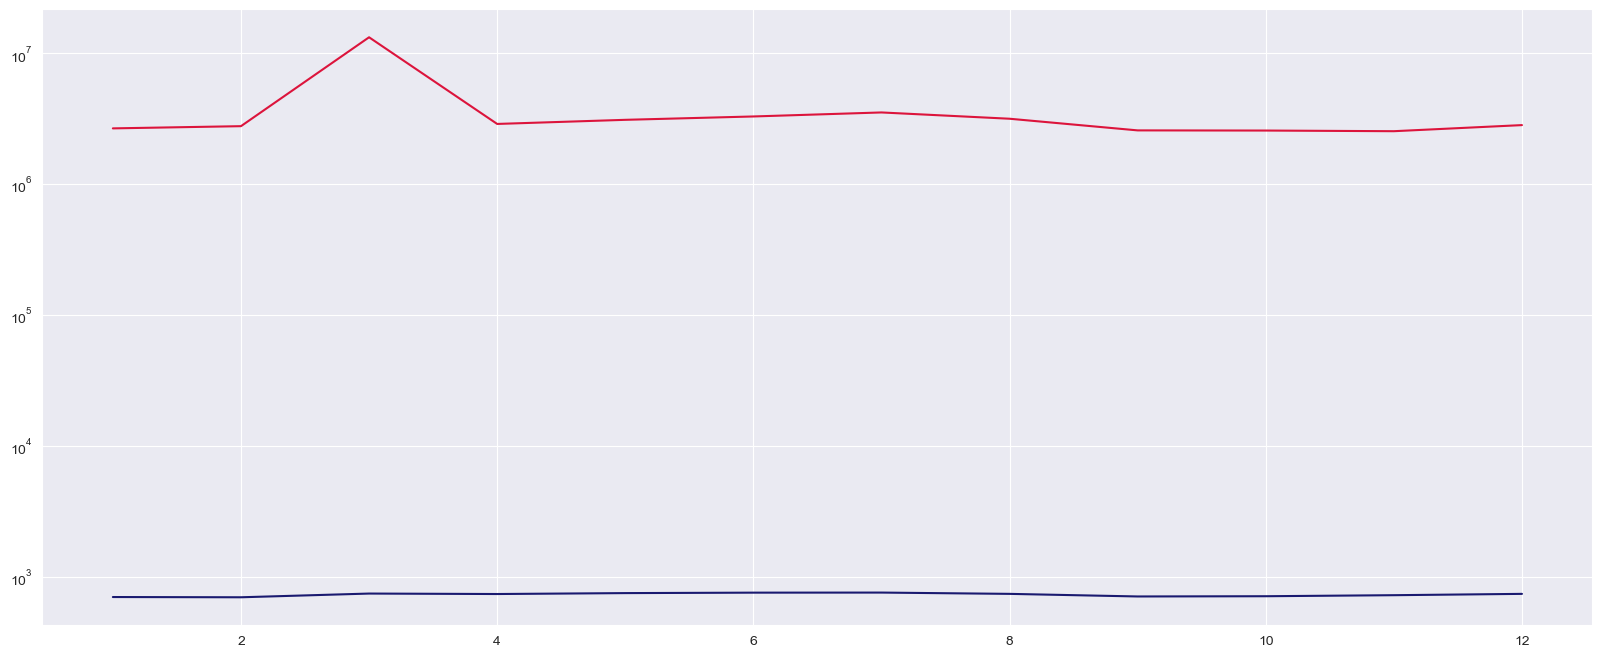

In [451]:
plt.figure(figsize=(20,8))
plt.plot(clientes_unicos, color="midnightblue")
plt.plot(cobrado_df2['monto_cobrado'], color="crimson")
plt.yscale('log')
plt.show()

## 28. Haga otro gráfico que le parezca interesante. ¿Qué idea trasmite con ese gráfico?


## 29. Imprima la ubicación de este notebook (el path)

In [ ]:
pwd